### Wheel of Emotions with Keras

This exercise was done with the data.world dataset and the tutorial below:
https://realpython.com/python-keras-text-classification/#keras-embedding-layer

In [6]:
import pandas as pd

# Kaggle data
df1=pd.read_csv('text_emotion.csv')

In [7]:
df1['content'].values

array(['@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[',
       'Layin n bed with a headache  ughhhh...waitin on your call...',
       'Funeral ceremony...gloomy friday...', ...,
       "Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",
       '@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!',
       '@mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla'],
      dtype=object)

In [8]:
df1['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [9]:
# Creating the train and the test data
from sklearn.model_selection import train_test_split


sentences = df1['content'].values
y = df1['sentiment'].values

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=42)

In [10]:
# Creating the feature vectors for each sentence of the training and testing set
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<30000x39515 sparse matrix of type '<class 'numpy.int64'>'
	with 357390 stored elements in Compressed Sparse Row format>

In [11]:
#reordering the sparse matrice indices
X_train = X_train.sorted_indices()
X_test = X_test.sorted_indices()

In [12]:
# Applying the logistic regression on the data
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=300)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.3399


/home/caroline09/anaconda3/envs/machlearn/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Keras Model

In [13]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))


In [14]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                395160    
_________________________________________________________________
dense_1 (Dense)              (None, 13)                143       
Total params: 395,303
Trainable params: 395,303
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, 
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=500)

Epoch 1/10
60/60 [==============================] - 1s 16ms/step - loss: 2.4405 - accuracy: 0.2377 - val_loss: 2.3226 - val_accuracy: 0.2843
Epoch 2/10
60/60 [==============================] - 1s 15ms/step - loss: 2.2190 - accuracy: 0.3229 - val_loss: 2.1917 - val_accuracy: 0.2916
Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 2.0878 - accuracy: 0.3602 - val_loss: 2.1246 - val_accuracy: 0.2998
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 1.9731 - accuracy: 0.3946 - val_loss: 2.0667 - val_accuracy: 0.3155
Epoch 5/10
60/60 [==============================] - 1s 16ms/step - loss: 1.8512 - accuracy: 0.4411 - val_loss: 2.0186 - val_accuracy: 0.3320
Epoch 6/10
60/60 [==============================] - 1s 12ms/step - loss: 1.7301 - accuracy: 0.4871 - val_loss: 1.9848 - val_accuracy: 0.3398
Epoch 7/10
60/60 [==============================] - 1s 13ms/step - loss: 1.6169 - accuracy: 0.5221 - val_loss: 1.9637 - val_accuracy: 0.3434
Epoch 8/10
60

In [16]:
from keras.backend import clear_session
clear_session()

In [17]:
# Evaluating the accuracy of the model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6477
Testing Accuracy:  0.3462


In [18]:
# Plot history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


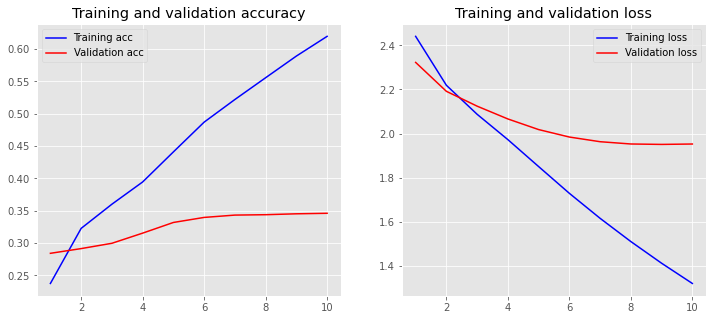

In [19]:
plot_history(history)

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Word Embeddings

In [21]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

dict_inv=dict((v,k) for k,v in tokenizer.word_index.items())
X_decoded = [dict_inv[v] for v in X_train[2]]
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])
print(X_decoded)

@jolynnchew so early??
[16, 287]
['so', 'early']


In [22]:
for word in ['the', 'all', 'bad']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 3
all: 30
bad: 122


In [23]:
# Pad_sequences with Keras
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[2224  309   71  930    5 1087 1760   14   60   77    8   61   23  105
    2   41    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


### Keras Embedding Layer

In [24]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model1.add(layers.Flatten())
model1.add(layers.Dense(10, activation='relu'))
model1.add(layers.Dense(13, activation='softmax'))
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           2010950   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 13)                143       
Total params: 2,061,103
Trainable params: 2,061,103
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 3s 45ms/step - loss: 2.3821 - accuracy: 0.2126 - val_loss: 2.3194 - val_accuracy: 0.2183
Epoch 2/10
60/60 [==============================] - 3s 44ms/step - loss: 2.2691 - accuracy: 0.2299 - val_loss: 2.2375 - val_accuracy: 0.2368
Epoch 3/10
60/60 [==============================] - 2s 41ms/step - loss: 2.1822 - accuracy: 0.2677 - val_loss: 2.1754 - val_accuracy: 0.2649
Epoch 4/10
60/60 [==============================] - 2s 41ms/step - loss: 2.1045 - accuracy: 0.2993 - val_loss: 2.1358 - val_accuracy: 0.2736
Epoch 5/10
60/60 [==============================] - 3s 43ms/step - loss: 2.0388 - accuracy: 0.3169 - val_loss: 2.1121 - val_accuracy: 0.2772
Epoch 6/10
60/60 [==============================] - 3s 45ms/step - loss: 1.9791 - accuracy: 0.3305 - val_loss: 2.0995 - val_accuracy: 0.2791
Epoch 7/10
60/60 [==============================] - 3s 43ms/step - loss: 1.9215 - accuracy: 0.3463 - val_loss: 2.0980 - val_accuracy: 0.2826
Epoch 8/10
60

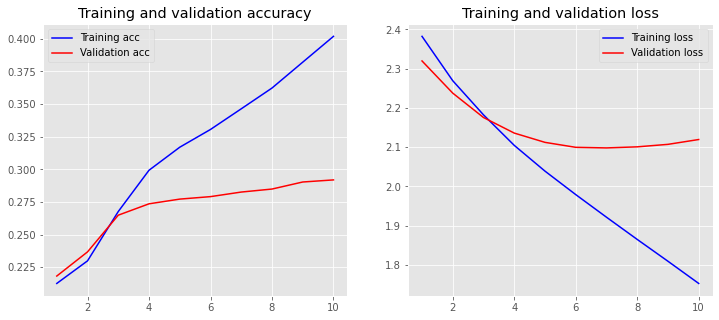

In [25]:
history1 = model1.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=500)
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history1)


In [26]:
# Using the global max pooling
from keras.models import Sequential
from keras import layers

embedding_dim = 50

modelGB = Sequential()
modelGB.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
modelGB.add(layers.GlobalMaxPool1D())
modelGB.add(layers.Dense(10, activation='relu'))
modelGB.add(layers.Dense(13, activation='softmax'))
modelGB.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modelGB.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           2010950   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                143       
Total params: 2,011,603
Trainable params: 2,011,603
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 3s 52ms/step - loss: 2.4989 - accuracy: 0.1553 - val_loss: 2.4048 - val_accuracy: 0.2316
Epoch 2/10
60/60 [==============================] - 3s 55ms/step - loss: 2.3047 - accuracy: 0.2227 - val_loss: 2.2169 - val_accuracy: 0.2183
Epoch 3/10
60/60 [==============================] - 3s 57ms/step - loss: 2.1629 - accuracy: 0.2226 - val_loss: 2.1233 - val_accuracy: 0.2545
Epoch 4/10
60/60 [==============================] - 3s 56ms/step - loss: 2.0766 - accuracy: 0.2884 - val_loss: 2.0727 - val_accuracy: 0.2749
Epoch 5/10
60/60 [==============================] - 3s 58ms/step - loss: 2.0065 - accuracy: 0.3101 - val_loss: 2.0269 - val_accuracy: 0.2895
Epoch 6/10
60/60 [==============================] - 3s 57ms/step - loss: 1.9288 - accuracy: 0.3480 - val_loss: 1.9847 - val_accuracy: 0.3109
Epoch 7/10
60/60 [==============================] - 3s 51ms/step - loss: 1.8539 - accuracy: 0.3857 - val_loss: 1.9587 - val_accuracy: 0.3343
Epoch 8/10
60

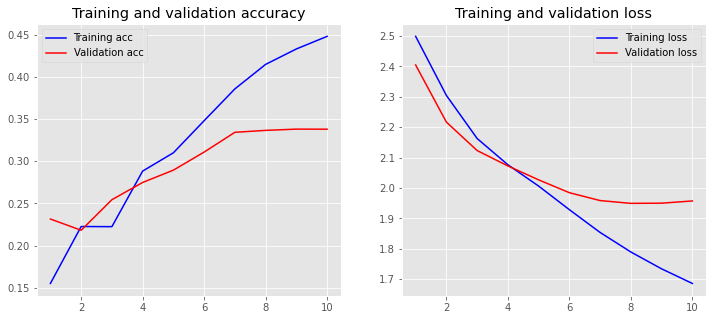

In [27]:
historyGB = modelGB.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=500)
loss, accuracy = modelGB.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelGB.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(historyGB)


### Using Pretrained Word Embeddings

In [28]:
# Creating embedding matrix
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix


In [29]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'data/glove.6B/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [30]:
# Look at how many of the embedding vectors are nonzero
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.4882518212785002

In [31]:
modelEM = Sequential()
modelEM.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
modelEM.add(layers.GlobalMaxPool1D())
modelEM.add(layers.Dense(10, activation='relu'))
modelEM.add(layers.Dense(13, activation='softmax'))
modelEM.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modelEM.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           2010950   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                143       
Total params: 2,011,603
Trainable params: 653
Non-trainable params: 2,010,950
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 1s 17ms/step - loss: 2.5886 - accuracy: 0.1112 - val_loss: 2.4480 - val_accuracy: 0.1311
Epoch 2/10
60/60 [==============================] - 1s 12ms/step - loss: 2.3776 - accuracy: 0.1588 - val_loss: 2.3242 - val_accuracy: 0.1876
Epoch 3/10
60/60 [==============================] - 1s 13ms/step - loss: 2.2563 - accuracy: 0.2061 - val_loss: 2.2131 - val_accuracy: 0.2135
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 2.1794 - accuracy: 0.2233 - val_loss: 2.1728 - val_accuracy: 0.2189
Epoch 5/10
60/60 [==============================] - 1s 12ms/step - loss: 2.1593 - accuracy: 0.2323 - val_loss: 2.1599 - val_accuracy: 0.2330
Epoch 6/10
60/60 [==============================] - 1s 16ms/step - loss: 2.1497 - accuracy: 0.2415 - val_loss: 2.1524 - val_accuracy: 0.2401
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 2.1427 - accuracy: 0.2485 - val_loss: 2.1451 - val_accuracy: 0.2499
Epoch 8/10
60

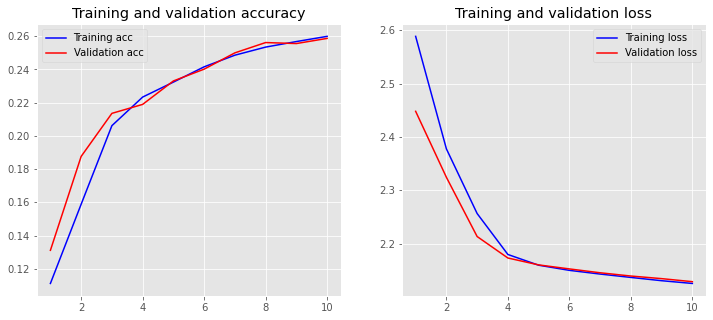

In [32]:
historyEM = modelEM.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=500)
loss, accuracy = modelEM.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelEM.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(historyEM)


In [33]:
modelGB1 = Sequential()
modelGB1.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
modelGB1.add(layers.GlobalMaxPool1D())
modelGB1.add(layers.Dense(10, activation='relu'))
modelGB1.add(layers.Dense(13, activation='softmax'))
modelGB1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modelGB1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           2010950   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 13)                143       
Total params: 2,011,603
Trainable params: 2,011,603
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 3s 45ms/step - loss: 2.5781 - accuracy: 0.1458 - val_loss: 2.4125 - val_accuracy: 0.1507
Epoch 2/10
60/60 [==============================] - 3s 44ms/step - loss: 2.3104 - accuracy: 0.1960 - val_loss: 2.2327 - val_accuracy: 0.2289
Epoch 3/10
60/60 [==============================] - 3s 43ms/step - loss: 2.1832 - accuracy: 0.2433 - val_loss: 2.1716 - val_accuracy: 0.2457
Epoch 4/10
60/60 [==============================] - 3s 46ms/step - loss: 2.1398 - accuracy: 0.2624 - val_loss: 2.1493 - val_accuracy: 0.2551
Epoch 5/10
60/60 [==============================] - 3s 55ms/step - loss: 2.1153 - accuracy: 0.2755 - val_loss: 2.1318 - val_accuracy: 0.2620
Epoch 6/10
60/60 [==============================] - 4s 59ms/step - loss: 2.0952 - accuracy: 0.2855 - val_loss: 2.1184 - val_accuracy: 0.2674
Epoch 7/10
60/60 [==============================] - 3s 56ms/step - loss: 2.0758 - accuracy: 0.2923 - val_loss: 2.1067 - val_accuracy: 0.2702
Epoch 8/10
60

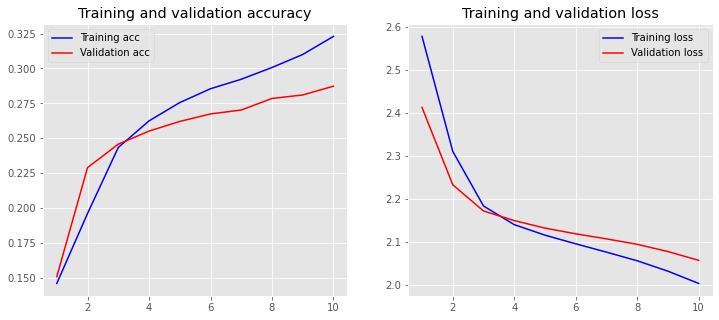

In [34]:
historyGB1 = modelGB1.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=500)
loss, accuracy = modelGB1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelGB1.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(historyGB1)


In [37]:
y_pred=modelGB1.predict(X_test,batch_size=64,verbose=1)

157/157 [==============================] - 1s 4ms/step


In [38]:
labels=np.unique(df1['sentiment'].values)
labels

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [39]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(1),target_names=labels))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        27
     boredom       0.00      0.00      0.00        43
       empty       0.00      0.00      0.00       203
  enthusiasm       0.00      0.00      0.00       204
         fun       0.00      0.00      0.00       421
   happiness       0.27      0.15      0.19      1288
        hate       0.00      0.00      0.00       332
        love       0.45      0.08      0.13       941
     neutral       0.30      0.59      0.40      2183
      relief       0.00      0.00      0.00       435
     sadness       0.19      0.03      0.05      1314
    surprise       0.00      0.00      0.00       516
       worry       0.27      0.62      0.38      2093

    accuracy                           0.29     10000
   macro avg       0.11      0.11      0.09     10000
weighted avg       0.23      0.29      0.21     10000



/home/caroline09/anaconda3/envs/machlearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Unfortunately the accuracy rate is low. That means than less than 30% of the emotions are predicted correctly.

In [43]:
# Predicting emotion
import numpy as np
def prediction_emotion(text):
    corpus_self=tokenizer.texts_to_sequences([text])
    corpus_pad=pad_sequences(corpus_self,padding='post',maxlen=maxlen)
    prediction_1 = modelGB1.predict(corpus_pad,batch_size=64,verbose=1)
    max_d=np.argmax(prediction_1)
    emotion_final = le.inverse_transform([max_d])
    return emotion_final

In [49]:
# Example
prediction_emotion("today is a good day")

1/1 [==============================] - 0s 3ms/step


array(['neutral'], dtype=object)